In [1]:
from __future__ import division, print_function
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "5"

In [2]:
%matplotlib inline

import keras
from keras.models import model_from_json
from keras.models import Model
import h5py
import numpy as np
from deeplift import dinuc_shuffle
from matplotlib import pyplot as plt
import sys
from deeplift.visualization import viz_sequence
import scipy
from scipy import stats


argmax_to_letter = {0:'A', 1:'C', 2:'G', 3:'T'}
def onehot_to_seq(onehot):
    seq = "".join([argmax_to_letter[x] for x in np.argmax(onehot,axis=-1)])
    return seq

def one_hot_encode_along_channel_axis(sequence):
    to_return = np.zeros((len(sequence),4), dtype=np.int8)
    seq_to_one_hot_fill_in_array(zeros_array=to_return,
                                 sequence=sequence, one_hot_axis=1)
    return to_return

def seq_to_one_hot_fill_in_array(zeros_array, sequence, one_hot_axis):
    assert one_hot_axis==0 or one_hot_axis==1
    if (one_hot_axis==0):
        assert zeros_array.shape[1] == len(sequence)
    elif (one_hot_axis==1): 
        assert zeros_array.shape[0] == len(sequence)
    #will mutate zeros_array
    for (i,char) in enumerate(sequence):
        if (char=="A" or char=="a"):
            char_idx = 0
        elif (char=="C" or char=="c"):
            char_idx = 1
        elif (char=="G" or char=="g"):
            char_idx = 2
        elif (char=="T" or char=="t"):
            char_idx = 3
        elif (char=="N" or char=="n"):
            continue #leave that pos as all 0's
        else:
            raise RuntimeError("Unsupported character: "+str(char))
        if (one_hot_axis==0):
            zeros_array[char_idx,i] = 1
        elif (one_hot_axis==1):
            zeros_array[i,char_idx] = 1

def compare_methods(method_1_name, method_2_name, score_lookup):
    method_1_scores=score_lookup[method_1_name]
    method_2_scores=score_lookup[method_2_name]
    differences = method_2_scores-method_1_scores
    sorted_differences = sorted(differences,key=lambda x:np.abs(x))
    #print(sorted_differences)
    positive_ranks = sum([x[0]+1 for x in enumerate(sorted_differences) if x[1] > 0])
    negative_ranks = sum([x[0]+1 for x in enumerate(sorted_differences) if x[1] < 0])
    wilcoxon_result = scipy.stats.wilcoxon(differences)
    if (wilcoxon_result.pvalue > 0.05):
        symbol = "~"
    else:
        symbol = ">"
    
    if (negative_ranks < positive_ranks):
        print(method_2_name," "+symbol+" ",method_1_name,"pval",wilcoxon_result.pvalue)
        plt.scatter(method_1_scores, method_2_scores, alpha=0.3)
        plt.plot([np.min(method_1_scores), np.max(method_1_scores)],
                 [np.min(method_1_scores), np.max(method_1_scores)],
                 color="black")
        plt.xlabel(method_1_name)
        plt.ylabel(method_2_name)     
    else:
        print(method_1_name," "+symbol+" ",method_2_name,"pval",wilcoxon_result.pvalue)
        plt.scatter(method_2_scores, method_1_scores, alpha=0.3)
        plt.plot([np.min(method_2_scores), np.max(method_2_scores)],
                 [np.min(method_2_scores), np.max(method_2_scores)],
                 color="black")
        plt.xlabel(method_2_name)
        plt.ylabel(method_1_name)
    plt.show()
    

Using TensorFlow backend.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead




###########
On model prefix record_1_model_Ba1Th 
############

avg_diff_meansubbed interspersed 0.118022405 num negative: 1076
avg_diff_zerod interspersed 1.7601789 num negative: 620

avg_diff_meansubbed random 0.14971182 num negative: 1055
avg_diff_zerod random 1.6891614 num negative: 614

avg_diff_meansubbed scores_ism 9.613912 num negative: 0
avg_diff_zerod scores_ism 12.280786 num negative: 2

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 8.543816 num negative: 2
avg_diff_zerod scores_deeplift_rescale_dinucshuff 11.563142 num negative: 2

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 8.012088 num negative: 53
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 11.029999 num negative: 11

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 7.2424207 num negative: 107
avg_diff_zerod scores_integrated_grad20_dinucshuff 12.022463 num negative: 25

avg_diff_meansubbed scores_grad_times_inp_flatref 7.7801223 num negative: 6
avg_diff_zerod scores_gra

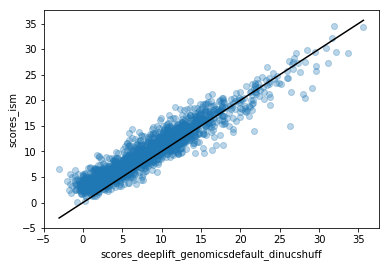

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 3.174056346897615e-139


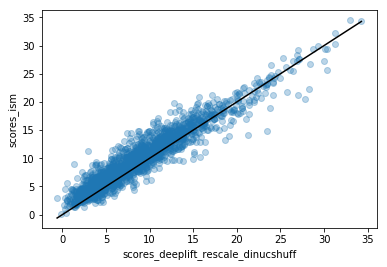

scores_ism  >  scores_integrated_grad20_dinucshuff pval 2.8174696587008407e-242


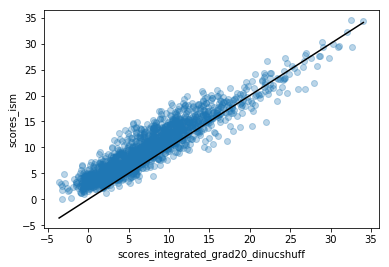

scores_ism  >  scores_grad_times_inp_flatref pval 6.281913104281267e-259


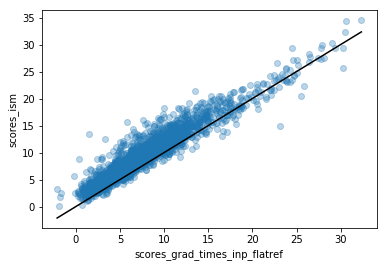

scores_deeplift_genomicsdefault_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.718826500629095e-72


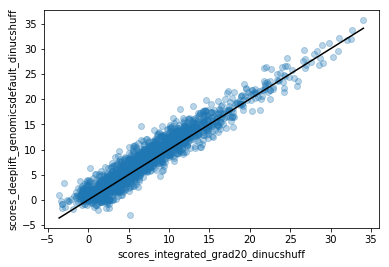

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 0.0005794892180390949


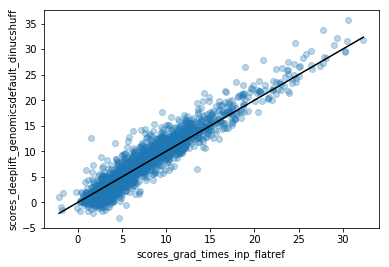

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 4.3198407479504703e-175


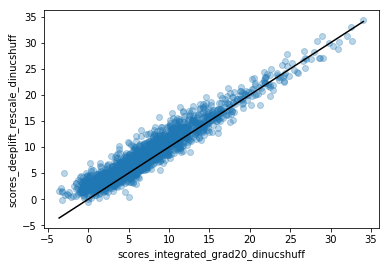

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 3.984960596755855e-73


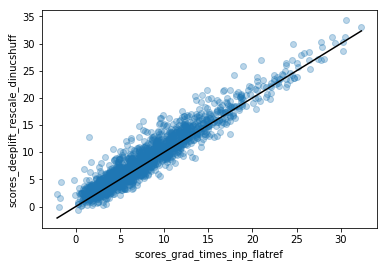

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 3.84217500505901e-55


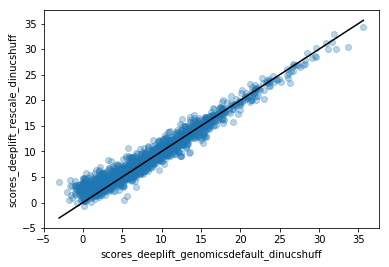

scores_grad_times_inp_flatref  >  scores_integrated_grad20_dinucshuff pval 5.850130006077226e-37


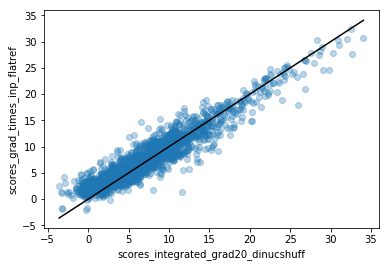



###########
On model prefix record_2_model_fijFp 
############

avg_diff_meansubbed interspersed 0.4680091 num negative: 1007
avg_diff_zerod interspersed -0.72004753 num negative: 1086

avg_diff_meansubbed random 0.48642483 num negative: 1000
avg_diff_zerod random -0.71825653 num negative: 1081

avg_diff_meansubbed scores_ism 11.743278 num negative: 0
avg_diff_zerod scores_ism 10.729203 num negative: 10

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 10.570711 num negative: 3
avg_diff_zerod scores_deeplift_rescale_dinucshuff 10.205005 num negative: 51

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 10.427229 num negative: 11
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 10.283958 num negative: 18

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 10.476989 num negative: 10
avg_diff_zerod scores_integrated_grad20_dinucshuff 10.47645 num negative: 21

avg_diff_meansubbed scores_grad_times_inp_flatref 9.969541 num negative: 3
avg_diff_zerod scor

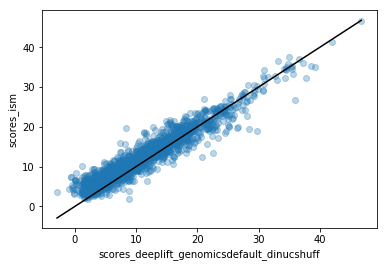

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 2.258288722353427e-124


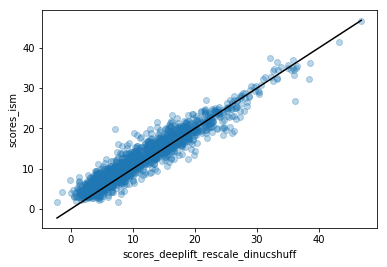

scores_ism  >  scores_integrated_grad20_dinucshuff pval 1.7035536763412843e-124


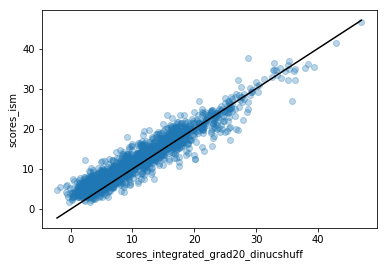

scores_ism  >  scores_grad_times_inp_flatref pval 4.374632702968057e-233


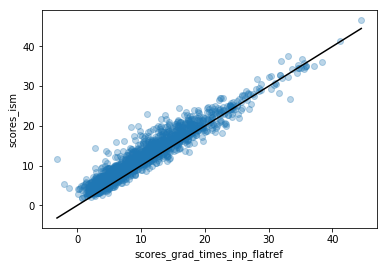

scores_integrated_grad20_dinucshuff  ~  scores_deeplift_genomicsdefault_dinucshuff pval 0.24000347195799976


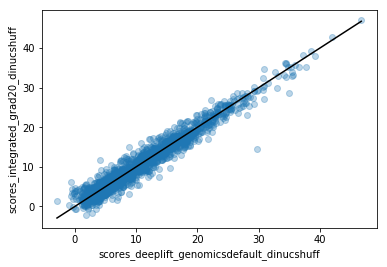

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 8.064232906431806e-14


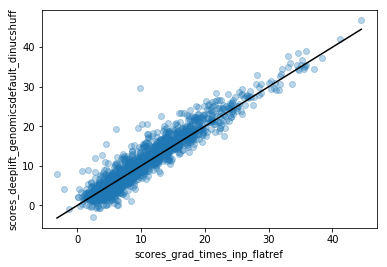

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 0.000949636561043412


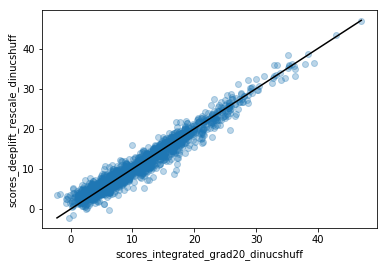

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 1.3694131952916328e-32


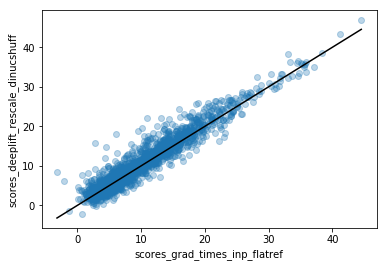

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 2.665355840827138e-06


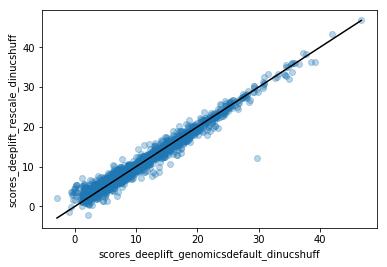

scores_integrated_grad20_dinucshuff  >  scores_grad_times_inp_flatref pval 4.648101390367246e-16


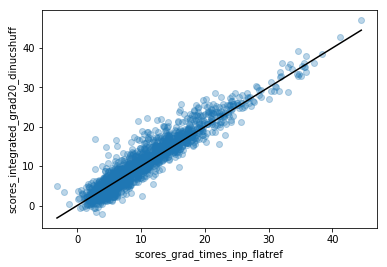



###########
On model prefix record_3_model_iNu96 
############

avg_diff_meansubbed interspersed 0.20258406 num negative: 1046
avg_diff_zerod interspersed -0.3534623 num negative: 1092

avg_diff_meansubbed random 0.19236146 num negative: 1021
avg_diff_zerod random -0.3524754 num negative: 1076

avg_diff_meansubbed scores_ism 12.881438 num negative: 0
avg_diff_zerod scores_ism 13.025048 num negative: 3

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 11.480158 num negative: 5
avg_diff_zerod scores_deeplift_rescale_dinucshuff 12.324535 num negative: 27

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 11.019008 num negative: 21
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 11.986399 num negative: 21

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 9.657928 num negative: 88
avg_diff_zerod scores_integrated_grad20_dinucshuff 11.436713 num negative: 65

avg_diff_meansubbed scores_grad_times_inp_flatref 10.453645 num negative: 7
avg_diff_zerod score

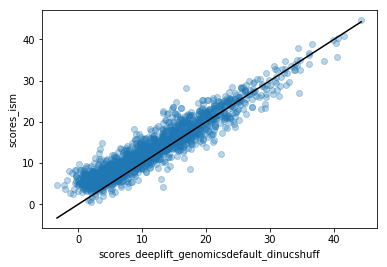

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 7.76624997292119e-126


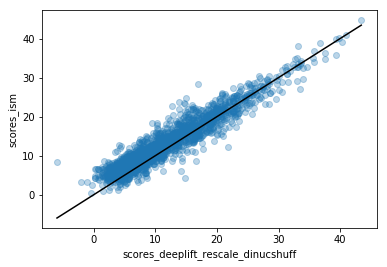

scores_ism  >  scores_integrated_grad20_dinucshuff pval 6.63626963018699e-255


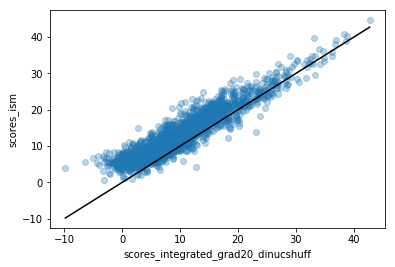

scores_ism  >  scores_grad_times_inp_flatref pval 4.1578294711442084e-250


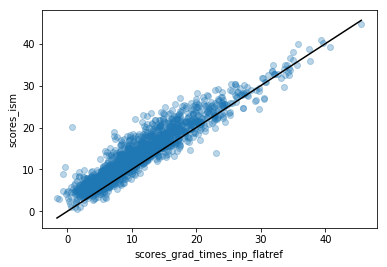

scores_deeplift_genomicsdefault_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.3058529334159581e-107


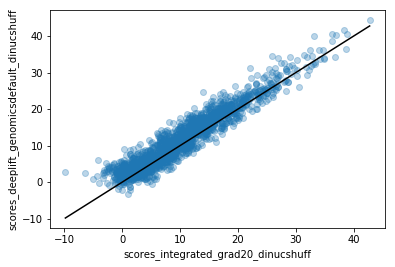

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 3.8467653203697844e-16


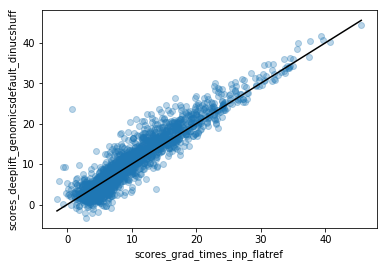

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.065518596066426e-184


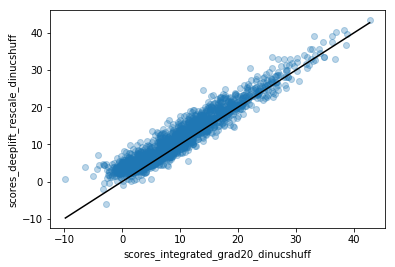

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 1.3380181875902433e-65


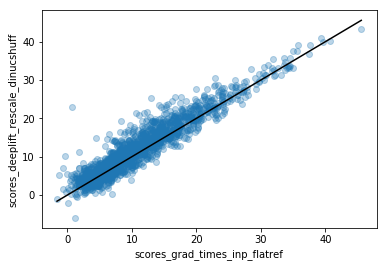

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 2.5782649335158477e-31


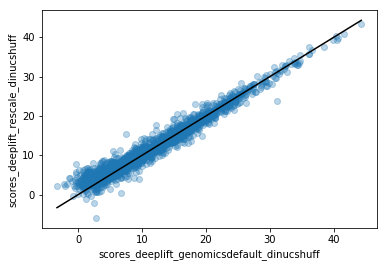

scores_grad_times_inp_flatref  >  scores_integrated_grad20_dinucshuff pval 3.380369711876455e-39


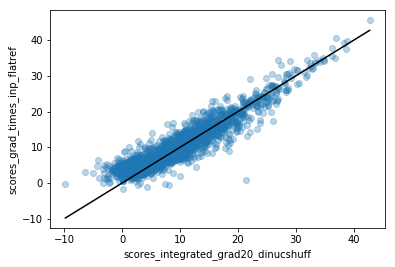



###########
On model prefix record_4_model_s3EVY 
############

avg_diff_meansubbed interspersed 0.5283845 num negative: 984
avg_diff_zerod interspersed 0.7582142 num negative: 870

avg_diff_meansubbed random 0.5104316 num negative: 1003
avg_diff_zerod random 0.50601995 num negative: 928

avg_diff_meansubbed scores_ism 10.392655 num negative: 0
avg_diff_zerod scores_ism 11.483173 num negative: 1

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 9.364637 num negative: 3
avg_diff_zerod scores_deeplift_rescale_dinucshuff 10.663261 num negative: 2

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 8.632597 num negative: 69
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 9.966347 num negative: 29

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 8.633871 num negative: 44
avg_diff_zerod scores_integrated_grad20_dinucshuff 10.581748 num negative: 4

avg_diff_meansubbed scores_grad_times_inp_flatref 8.480673 num negative: 7
avg_diff_zerod scores_grad_times

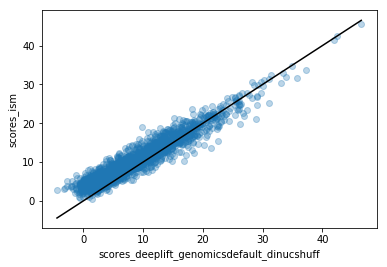

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 7.637253029498533e-117


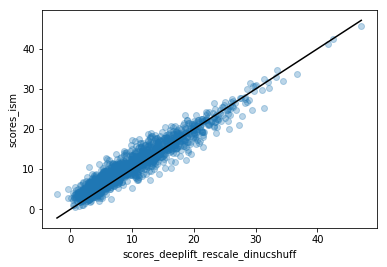

scores_ism  >  scores_integrated_grad20_dinucshuff pval 1.487569643454713e-186


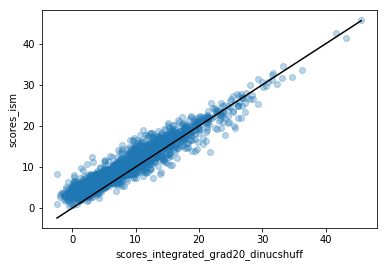

scores_ism  >  scores_grad_times_inp_flatref pval 2.2472690922482515e-267


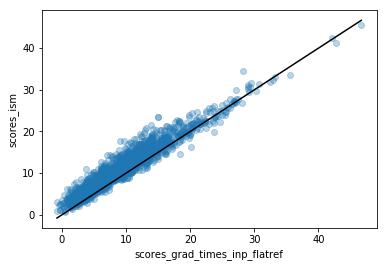

scores_integrated_grad20_dinucshuff  ~  scores_deeplift_genomicsdefault_dinucshuff pval 0.5493850095292772


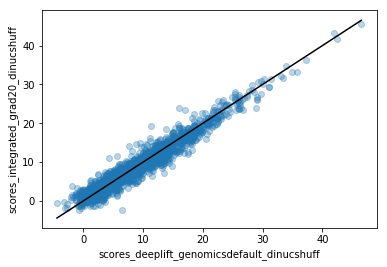

scores_deeplift_genomicsdefault_dinucshuff  ~  scores_grad_times_inp_flatref pval 0.2060038112939484


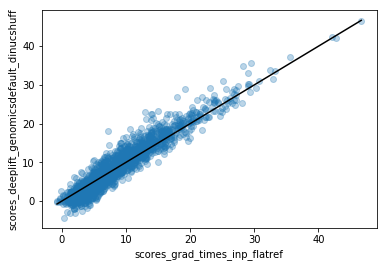

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.33813817609137e-76


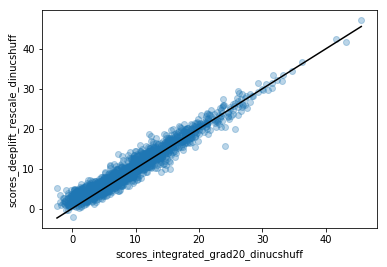

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 5.008009279444942e-88


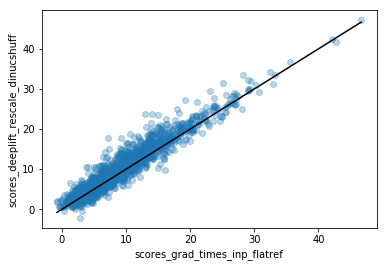

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 1.0575935126298996e-90


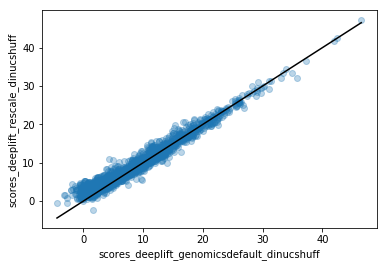

scores_integrated_grad20_dinucshuff  ~  scores_grad_times_inp_flatref pval 0.23207826379805907


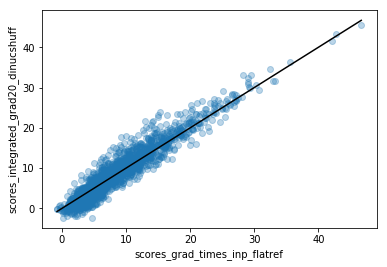



###########
On model prefix record_5_model_k1Ccu 
############

avg_diff_meansubbed interspersed 0.47562233 num negative: 1046
avg_diff_zerod interspersed 0.5923864 num negative: 964

avg_diff_meansubbed random 0.4678728 num negative: 1022
avg_diff_zerod random 0.27748004 num negative: 1029

avg_diff_meansubbed scores_ism 10.380531 num negative: 2
avg_diff_zerod scores_ism 11.273715 num negative: 1

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 9.537191 num negative: 4
avg_diff_zerod scores_deeplift_rescale_dinucshuff 11.004004 num negative: 3

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 9.207111 num negative: 11
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 10.53865 num negative: 11

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 8.699986 num negative: 41
avg_diff_zerod scores_integrated_grad20_dinucshuff 10.505538 num negative: 23

avg_diff_meansubbed scores_grad_times_inp_flatref 8.660014 num negative: 7
avg_diff_zerod scores_grad_t

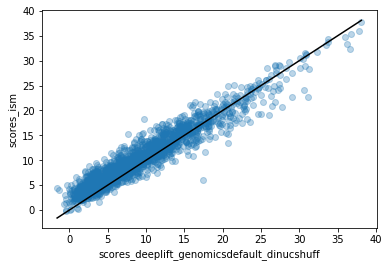

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 8.036402059182585e-93


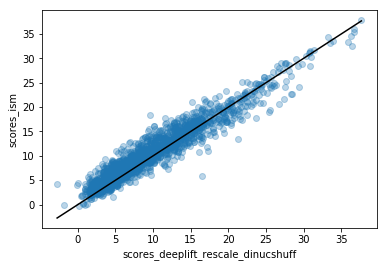

scores_ism  >  scores_integrated_grad20_dinucshuff pval 1.768535519022633e-179


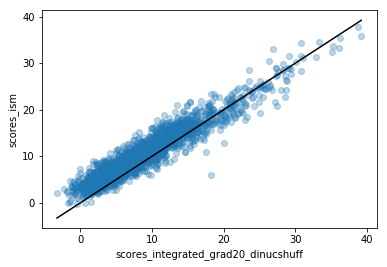

scores_ism  >  scores_grad_times_inp_flatref pval 5.040308001505387e-243


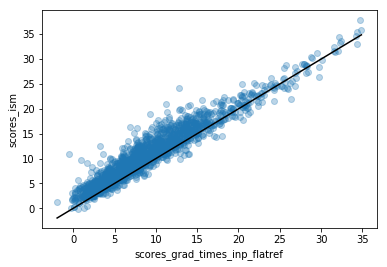

scores_deeplift_genomicsdefault_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.090270316010771e-38


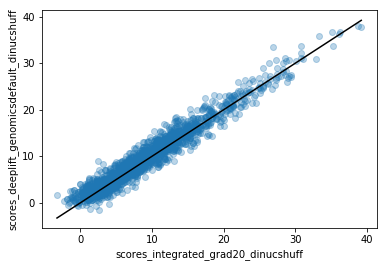

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 2.2246028838156045e-21


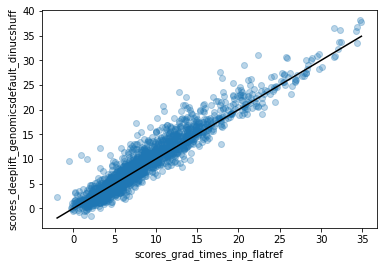

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.2399322225489078e-104


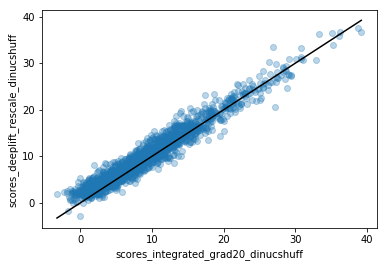

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 3.4637193816501926e-87


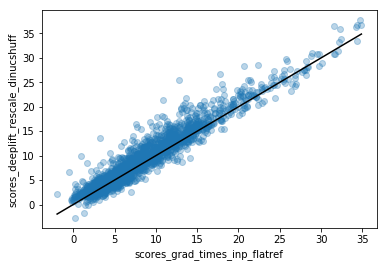

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 8.233548303166394e-36


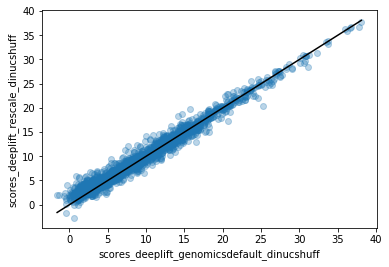

scores_grad_times_inp_flatref  ~  scores_integrated_grad20_dinucshuff pval 0.08910964769162348


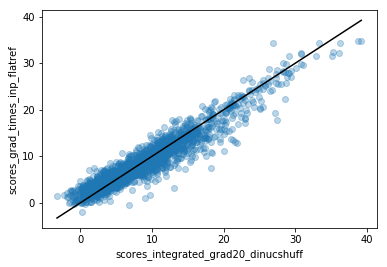



###########
On model prefix record_6_model_X79UW 
############

avg_diff_meansubbed interspersed 0.28920382 num negative: 1011
avg_diff_zerod interspersed -0.5475253 num negative: 1163

avg_diff_meansubbed random 0.28990924 num negative: 1019
avg_diff_zerod random -0.6209118 num negative: 1193

avg_diff_meansubbed scores_ism 11.064039 num negative: 0
avg_diff_zerod scores_ism 12.083153 num negative: 0

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 10.027896 num negative: 4
avg_diff_zerod scores_deeplift_rescale_dinucshuff 11.27093 num negative: 12

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 9.310824 num negative: 46
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 10.478114 num negative: 61

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 9.008511 num negative: 33
avg_diff_zerod scores_integrated_grad20_dinucshuff 10.672436 num negative: 34

avg_diff_meansubbed scores_grad_times_inp_flatref 9.008705 num negative: 9
avg_diff_zerod scores_g

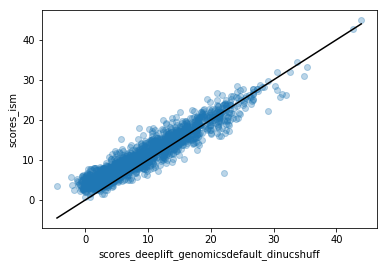

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 1.9712673197610315e-117


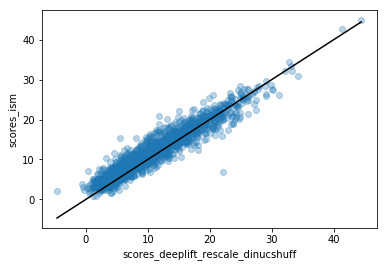

scores_ism  >  scores_integrated_grad20_dinucshuff pval 9.504960494079012e-215


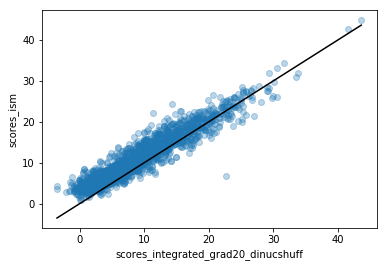

scores_ism  >  scores_grad_times_inp_flatref pval 2.7821234504080553e-258


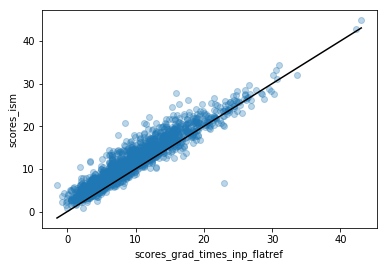

scores_deeplift_genomicsdefault_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 6.737238553052566e-13


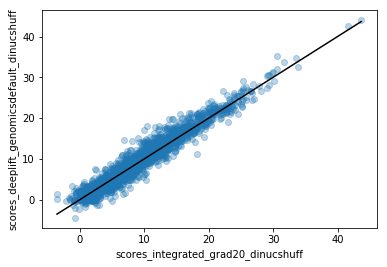

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 0.0019323550625581951


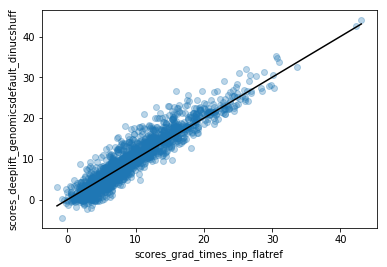

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.3403741607264537e-122


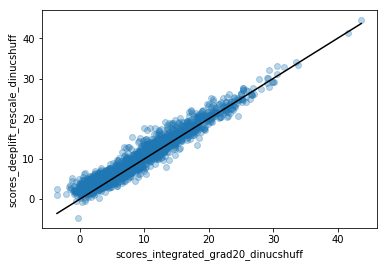

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 1.2662027409022443e-89


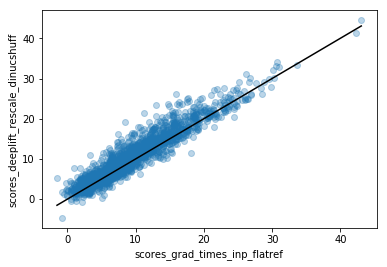

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 1.0609477139567053e-81


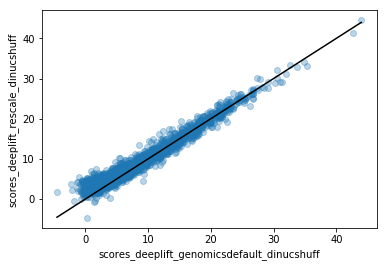

scores_grad_times_inp_flatref  >  scores_integrated_grad20_dinucshuff pval 0.01138476621646209


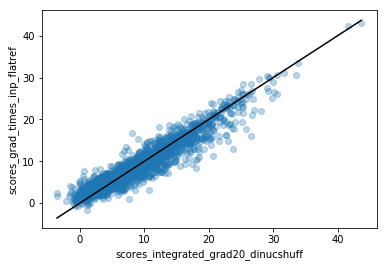



###########
On model prefix record_7_model_XpjQJ 
############

avg_diff_meansubbed interspersed 0.7294994 num negative: 964
avg_diff_zerod interspersed -0.2785041 num negative: 1123

avg_diff_meansubbed random 0.64004797 num negative: 960
avg_diff_zerod random -0.55696523 num negative: 1171

avg_diff_meansubbed scores_ism 12.829935 num negative: 0
avg_diff_zerod scores_ism 13.028846 num negative: 1

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 11.591993 num negative: 5
avg_diff_zerod scores_deeplift_rescale_dinucshuff 12.230438 num negative: 21

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 11.15749 num negative: 8
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 11.950747 num negative: 15

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 10.104916 num negative: 95
avg_diff_zerod scores_integrated_grad20_dinucshuff 10.798465 num negative: 128

avg_diff_meansubbed scores_grad_times_inp_flatref 10.858023 num negative: 2
avg_diff_zerod scores_

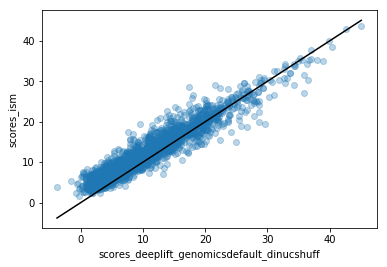

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 4.1894800253198387e-122


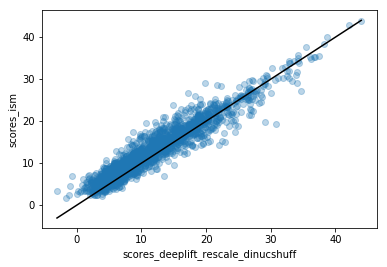

scores_ism  >  scores_integrated_grad20_dinucshuff pval 1.5128108178202393e-215


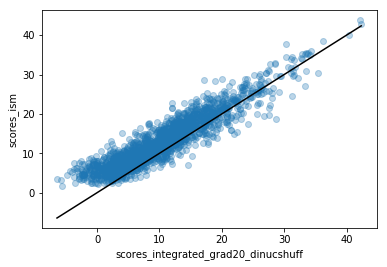

scores_ism  >  scores_grad_times_inp_flatref pval 3.5101205405124787e-236


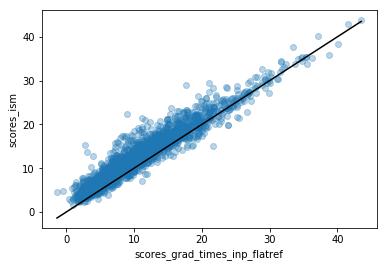

scores_deeplift_genomicsdefault_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.3571871926651371e-77


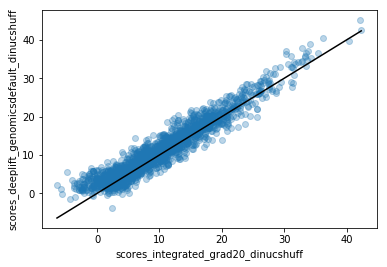

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 0.00019634696082842075


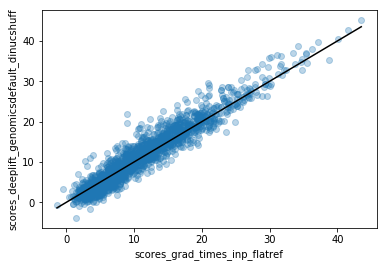

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 3.378756704072816e-142


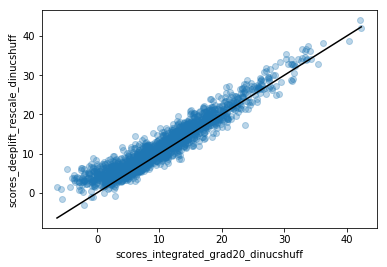

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 6.36463096775775e-51


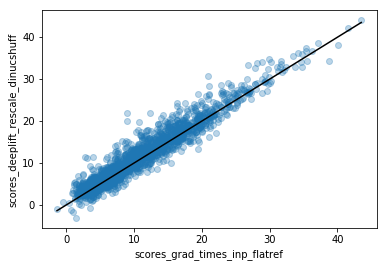

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 1.0520593314240922e-37


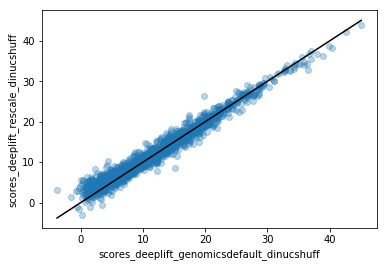

scores_grad_times_inp_flatref  >  scores_integrated_grad20_dinucshuff pval 5.575321325144969e-34


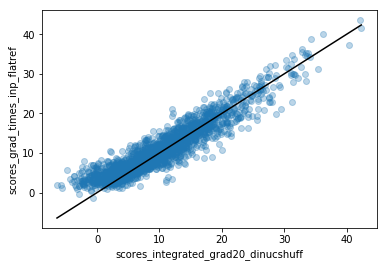



###########
On model prefix record_8_model_XchY4 
############

avg_diff_meansubbed interspersed 0.13679351 num negative: 1076
avg_diff_zerod interspersed 0.26008525 num negative: 995

avg_diff_meansubbed random 0.17378095 num negative: 1070
avg_diff_zerod random 0.08990331 num negative: 990

avg_diff_meansubbed scores_ism 8.515094 num negative: 2
avg_diff_zerod scores_ism 8.619807 num negative: 5

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 7.690086 num negative: 12
avg_diff_zerod scores_deeplift_rescale_dinucshuff 8.278051 num negative: 39

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 7.2535915 num negative: 36
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 8.049496 num negative: 21

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 7.40659 num negative: 20
avg_diff_zerod scores_integrated_grad20_dinucshuff 8.28183 num negative: 15

avg_diff_meansubbed scores_grad_times_inp_flatref 7.1257467 num negative: 6
avg_diff_zerod scores_grad_ti

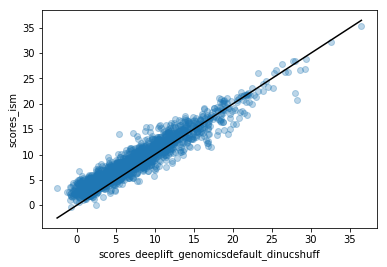

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 3.7550806874417846e-118


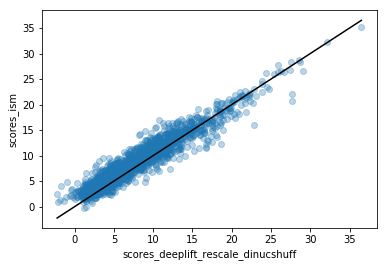

scores_ism  >  scores_integrated_grad20_dinucshuff pval 7.810316072950518e-158


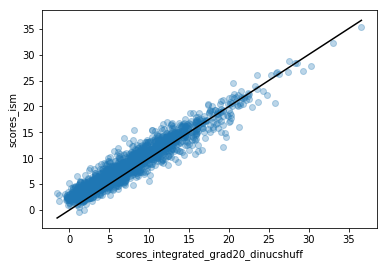

scores_ism  >  scores_grad_times_inp_flatref pval 2.7505901194741885e-247


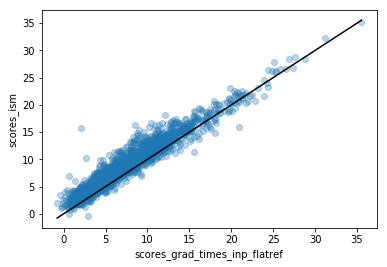

scores_integrated_grad20_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 4.095718930797619e-08


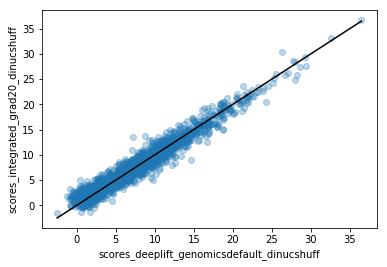

scores_deeplift_genomicsdefault_dinucshuff  ~  scores_grad_times_inp_flatref pval 0.411891261343755


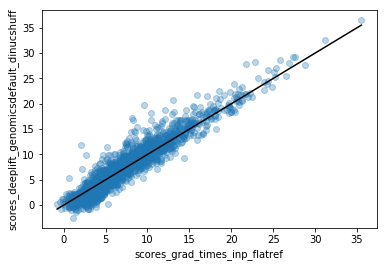

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.6588094445848144e-29


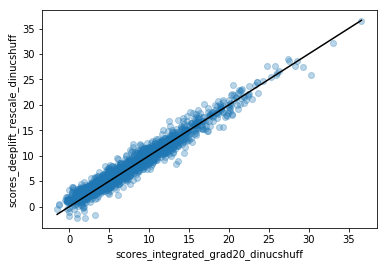

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 2.5883770107966868e-51


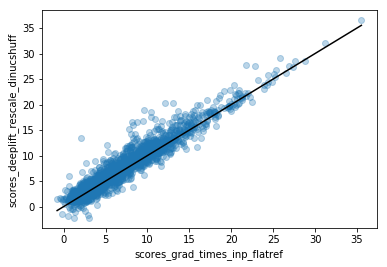

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 3.3998021552610383e-60


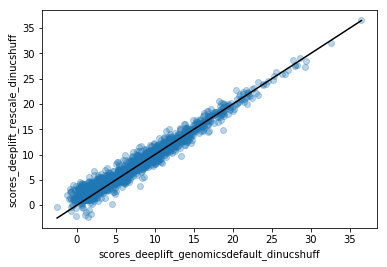

scores_integrated_grad20_dinucshuff  >  scores_grad_times_inp_flatref pval 4.458283950255955e-09


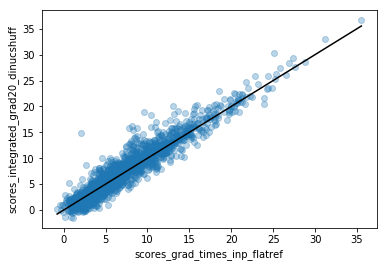



###########
On model prefix record_9_model_8fTYg 
############

avg_diff_meansubbed interspersed 0.21149178 num negative: 1040
avg_diff_zerod interspersed 0.89847165 num negative: 826

avg_diff_meansubbed random 0.21201245 num negative: 1059
avg_diff_zerod random 0.64781916 num negative: 840

avg_diff_meansubbed scores_ism 10.494108 num negative: 0
avg_diff_zerod scores_ism 10.658003 num negative: 6

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 9.478775 num negative: 2
avg_diff_zerod scores_deeplift_rescale_dinucshuff 10.396921 num negative: 9

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 9.26372 num negative: 16
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 10.339131 num negative: 33

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 9.368241 num negative: 16
avg_diff_zerod scores_integrated_grad20_dinucshuff 10.583443 num negative: 7

avg_diff_meansubbed scores_grad_times_inp_flatref 8.799544 num negative: 6
avg_diff_zerod scores_grad_t

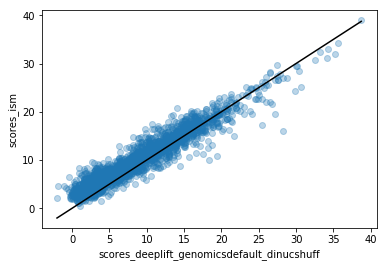

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 2.1676559973690767e-118


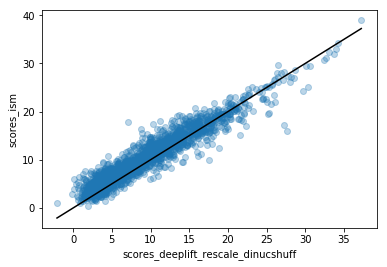

scores_ism  >  scores_integrated_grad20_dinucshuff pval 1.8361911748124758e-127


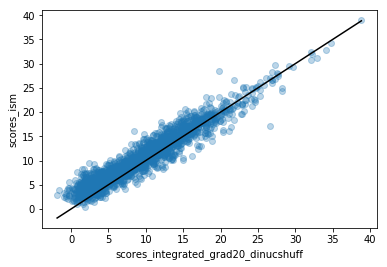

scores_ism  >  scores_grad_times_inp_flatref pval 1.6532843850673687e-249


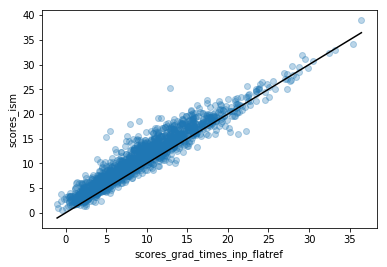

scores_integrated_grad20_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 0.0006467496175675671


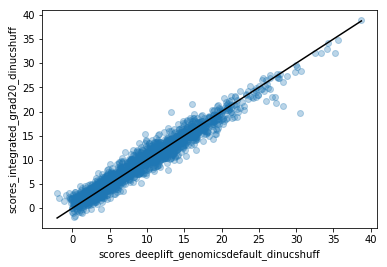

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 8.690853214085031e-21


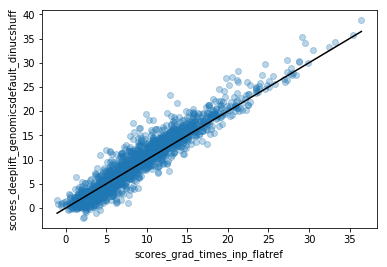

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 1.7663372885023064e-05


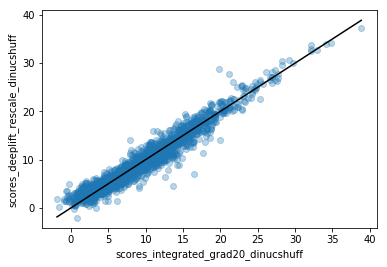

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 9.030721671863505e-59


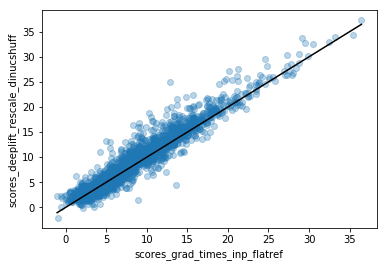

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 6.4303086030879136e-15


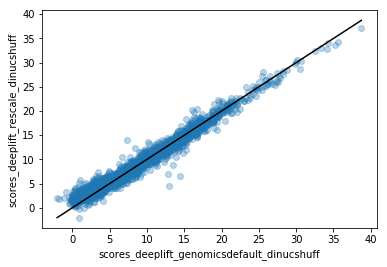

scores_integrated_grad20_dinucshuff  >  scores_grad_times_inp_flatref pval 1.3521129977436147e-35


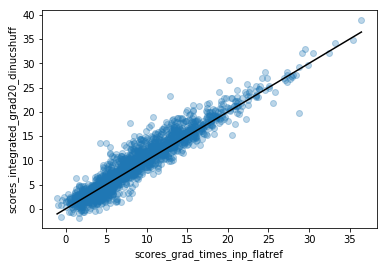



###########
On model prefix record_10_model_xpYJA 
############

avg_diff_meansubbed interspersed 0.24617866 num negative: 1041
avg_diff_zerod interspersed 1.0625861 num negative: 743

avg_diff_meansubbed random 0.24768643 num negative: 1032
avg_diff_zerod random 0.63699174 num negative: 842

avg_diff_meansubbed scores_ism 7.9799953 num negative: 0
avg_diff_zerod scores_ism 9.398986 num negative: 3

avg_diff_meansubbed scores_deeplift_rescale_dinucshuff 7.4208155 num negative: 3
avg_diff_zerod scores_deeplift_rescale_dinucshuff 9.023983 num negative: 5

avg_diff_meansubbed scores_deeplift_genomicsdefault_dinucshuff 6.912465 num negative: 41
avg_diff_zerod scores_deeplift_genomicsdefault_dinucshuff 8.634656 num negative: 12

avg_diff_meansubbed scores_integrated_grad20_dinucshuff 6.1778574 num negative: 155
avg_diff_zerod scores_integrated_grad20_dinucshuff 8.257761 num negative: 55

avg_diff_meansubbed scores_grad_times_inp_flatref 6.4994316 num negative: 5
avg_diff_zerod scores_grad

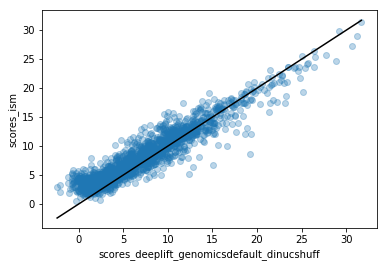

scores_ism  >  scores_deeplift_rescale_dinucshuff pval 4.6254567753925716e-66


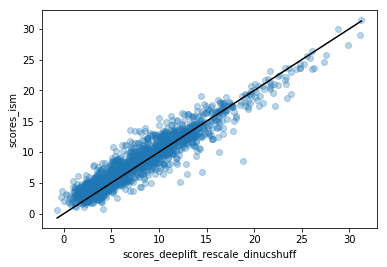

scores_ism  >  scores_integrated_grad20_dinucshuff pval 5.959692165819594e-200


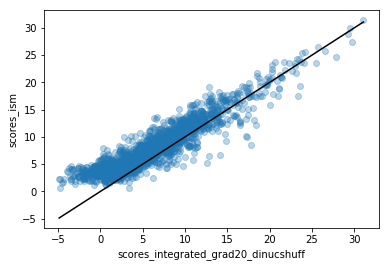

scores_ism  >  scores_grad_times_inp_flatref pval 1.2807828168792888e-252


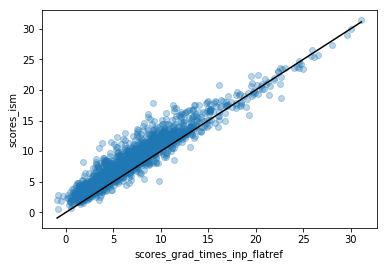

scores_deeplift_genomicsdefault_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 9.512543143347387e-60


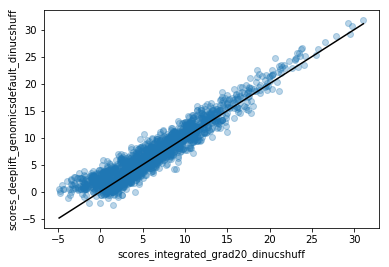

scores_deeplift_genomicsdefault_dinucshuff  >  scores_grad_times_inp_flatref pval 6.129805959745485e-21


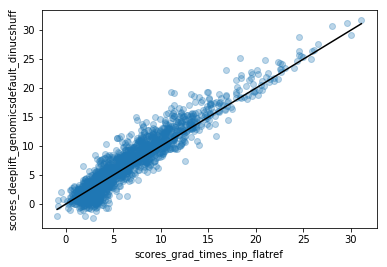

scores_deeplift_rescale_dinucshuff  >  scores_integrated_grad20_dinucshuff pval 2.4518943378839284e-153


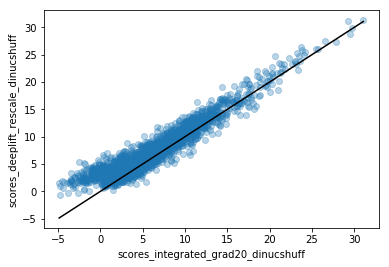

scores_deeplift_rescale_dinucshuff  >  scores_grad_times_inp_flatref pval 5.026434497485695e-132


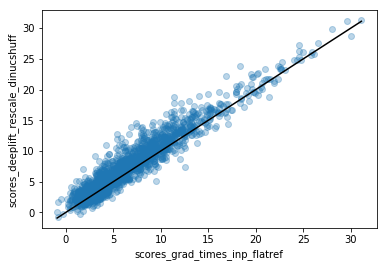

scores_deeplift_rescale_dinucshuff  >  scores_deeplift_genomicsdefault_dinucshuff pval 4.551684456259728e-73


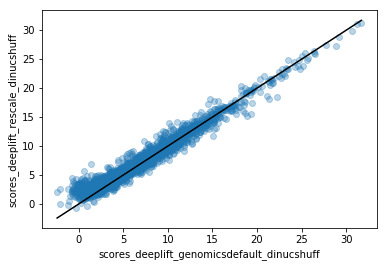

scores_grad_times_inp_flatref  >  scores_integrated_grad20_dinucshuff pval 3.3283111658115535e-13


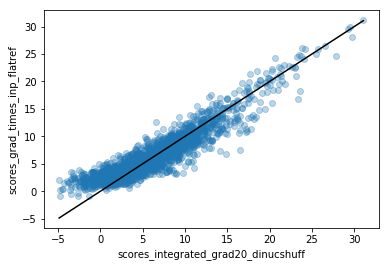

In [3]:
import numpy as np
import random

#dan preinit
#model_prefix = "record_21_model_NZqHC"
#model_prefix = "record_20_model_QFbAM"

model_prefixes = [
    "record_1_model_Ba1Th",
    "record_2_model_fijFp",
    "record_3_model_iNu96",
    "record_4_model_s3EVY",
    "record_5_model_k1Ccu",
    "record_6_model_X79UW",
    "record_7_model_XpjQJ",
    "record_8_model_XchY4",
    "record_9_model_8fTYg",
    "record_10_model_xpYJA"
]

#trained from scratch
#model_prefix = "record_15_model_REDP7"

#fcfromscratch
#model_prefix = "record_25_model_Fq78N"
#imp_scores_folder = "imp_scores/fcfromscratch-randinporder"

model_id_to_subbed_diffs_lookup = {}
model_id_to_zerod_diffs_lookup = {}
model_id_to_shuffled_onehot_seqs = {}
model_id_to_predictive_model = {}
model_id_to_method_to_tozero = {}

for model_prefix in model_prefixes:
    print("\n\n###########\nOn model prefix",model_prefix,"\n############")
    
    model_weights = "model_files/"+model_prefix+"_modelWeights.h5"
    model_json = "model_files/"+model_prefix+"_modelJson.json"

    keras_model = model_from_json(open(model_json).read())
    keras_model.load_weights(model_weights)

    preact_model = Model(inputs=keras_model.input,
                         outputs=keras_model.layers[-2].output)
    model_id_to_predictive_model[model_prefix] = preact_model

    imp_scores_fh = h5py.File("imp_scores/imp_scores_"+model_prefix+".h5", "r")
    onehot_seq = np.array(imp_scores_fh['onehot'])
    orig_preds = preact_model.predict(onehot_seq).squeeze()
    
    seqs = [onehot_to_seq(x) for x in onehot_seq]
    shuffled_onehot_seqs = []
    num_shuffles_to_make = 10
    np.random.seed(1234)
    random.seed(1234)
    for i in range(num_shuffles_to_make):
        shuffled_onehot_seqs.append(np.array(
                [one_hot_encode_along_channel_axis(dinuc_shuffle.dinuc_shuffle(x)) for x in seqs]))
    model_id_to_shuffled_onehot_seqs[model_prefix] = shuffled_onehot_seqs

    #######Score things
    method_to_zerod_diffs = {}
    method_to_subbed_diffs = {}

    percentile = 80

    scoring_methods = [
        'interspersed',
        'random',
        'scores_ism',
        'scores_deeplift_rescale_dinucshuff',
        'scores_deeplift_genomicsdefault_dinucshuff',
        'scores_integrated_grad20_dinucshuff',
        'scores_grad_times_inp_flatref',

        'scores_integrated_grad20_avgposref',
        'scores_deeplift_rescale_avgposref',
        'scores_deeplift_genomicsdefault_avgposref',
        'scores_integrated_grad20_flatref',
        'scores_deeplift_rescale_flatref',
        'scores_deeplift_genomicsdefault_flatref',

        'scores_integrated_grad10_dinucshuff',
        'scores_integrated_grad2_dinucshuff',
        'scores_integrated_grad5_dinucshuff',     
    ]
    
    method_to_tozero = {}

    for method in scoring_methods:
        #print(method)
        if (method != "interspersed" and method != "random"):
            sys.stdout.flush()
            scores = np.array(imp_scores_fh[method])
            central_scores = scores[:,350:650]

            #for each example, zero out the top 10% of scores

            #to_zero = list(zip(*np.nonzero(central_scores > np.percentile(central_scores,percentile))))
            #print(len(to_zero))
            
            to_zero_unflat = [np.nonzero(ex_central_scores >
                                          np.percentile(ex_central_scores,percentile))[0]
                                          for ex_central_scores in central_scores]  
        else:
            
            num_to_zero = int(300*(1-(percentile/100)))
            if (method=="interspersed"):
                interval_size = int(300/num_to_zero)
                to_zero_unflat = [[i for i in range(int(0.5*interval_size),300,interval_size)]
                                  for x in onehot_seq]
            else:
                assert method=="random"
                to_zero_unflat = [np.random.choice(a=list(range(300)), size=num_to_zero, replace=False)
                                  for x in onehot_seq]
        
        method_to_tozero[method] = to_zero_unflat
        to_zero = [(i,x) for (i,arr) in enumerate(to_zero_unflat) for x in arr]
        
        zerod_inputs = np.array(onehot_seq)
        for example_idx, col_idx in to_zero:
            zerod_inputs[example_idx,350+col_idx] = 0.25

        subbed_inputs_sets = []
        for i in range(num_shuffles_to_make):
            subbed_inputs = np.array(onehot_seq)
            for example_idx, col_idx in to_zero:
                subbed_inputs[example_idx,350+col_idx] = shuffled_onehot_seqs[i][example_idx,350+col_idx]
            subbed_inputs_sets.append(subbed_inputs)
        mean_subbed_preds = np.mean(np.array([preact_model.predict(x).squeeze() for x in subbed_inputs_sets]),axis=0)
        method_to_subbed_diffs[method] = orig_preds-mean_subbed_preds
        print("\navg_diff_meansubbed",method,np.mean(orig_preds-mean_subbed_preds),"num negative:",np.sum(orig_preds-mean_subbed_preds < 0))

        #viz_sequence.plot_weights((onehot_seq[0]*scores[0][:,None])[350:650])
        #viz_sequence.plot_weights((altered_inputs[0]*scores[0][:,None])[350:650])

        zerod_preds = np.squeeze(preact_model.predict(zerod_inputs))
        method_to_zerod_diffs[method] = orig_preds-zerod_preds
        print("avg_diff_zerod",method,np.mean(orig_preds-zerod_preds),"num negative:",np.sum(orig_preds-zerod_preds < 0))

        sys.stdout.flush()
    
    ########Run comparisons
    
    model_id_to_subbed_diffs_lookup[model_prefix] = method_to_subbed_diffs
    model_id_to_zerod_diffs_lookup[model_prefix] = method_to_zerod_diffs
    model_id_to_method_to_tozero[model_prefix] = method_to_tozero

    diffs_lookup = method_to_subbed_diffs    

    #print("Compare to ISM")
    print("\n##Comparisons##\n")

    compare_methods(method_1_name="scores_ism",
                    method_2_name="scores_deeplift_genomicsdefault_dinucshuff",
                    score_lookup=diffs_lookup)
    compare_methods(method_1_name="scores_ism",
                    method_2_name="scores_deeplift_rescale_dinucshuff",
                    score_lookup=diffs_lookup)
    compare_methods(method_1_name="scores_ism",
                    method_2_name="scores_integrated_grad20_dinucshuff",
                    score_lookup=diffs_lookup)
    compare_methods(method_1_name="scores_ism",
                    method_2_name="scores_grad_times_inp_flatref",
                    score_lookup=diffs_lookup)

    #print("Comparisons to DeepLIFT")

    compare_methods(method_1_name="scores_integrated_grad20_dinucshuff",
                    method_2_name="scores_deeplift_genomicsdefault_dinucshuff",
                    score_lookup=diffs_lookup)
    compare_methods(method_1_name="scores_grad_times_inp_flatref",
                    method_2_name="scores_deeplift_genomicsdefault_dinucshuff",
                    score_lookup=diffs_lookup)
    
    compare_methods(method_1_name="scores_integrated_grad20_dinucshuff",
                    method_2_name="scores_deeplift_rescale_dinucshuff",
                    score_lookup=diffs_lookup)
    compare_methods(method_1_name="scores_grad_times_inp_flatref",
                    method_2_name="scores_deeplift_rescale_dinucshuff",
                    score_lookup=diffs_lookup)

    #print("Deeplift revealcancel vs rescale")

    compare_methods(method_1_name="scores_deeplift_rescale_dinucshuff",
                    method_2_name="scores_deeplift_genomicsdefault_dinucshuff",
                    score_lookup=diffs_lookup)

    #print("Grad times inp vs intgrad")
    compare_methods(method_1_name="scores_grad_times_inp_flatref",
                    method_2_name="scores_integrated_grad20_dinucshuff",
                    score_lookup=diffs_lookup)
    
    #print("Compare references")
    #compare_methods(method_1_name="scores_integrated_grad20_flatref",
    #                method_2_name="scores_integrated_grad20_dinucshuff",
    #                score_lookup=diffs_lookup)
    #compare_methods(method_1_name="scores_integrated_grad20_avgposref",
    #                method_2_name="scores_integrated_grad20_dinucshuff",
    #                score_lookup=diffs_lookup)
    #compare_methods(method_1_name="scores_deeplift_rescale_flatref",
    #                method_2_name="scores_deeplift_rescale_dinucshuff",
    #                score_lookup=diffs_lookup)
    #compare_methods(method_1_name="scores_deeplift_rescale_avgposref",
    #                method_2_name="scores_deeplift_rescale_dinucshuff",
    #                score_lookup=diffs_lookup)
    #compare_methods(method_1_name="scores_deeplift_genomicsdefault_flatref",
    #                method_2_name="scores_deeplift_genomicsdefault_dinucshuff",
    #                score_lookup=diffs_lookup)
    #compare_methods(method_1_name="scores_deeplift_genomicsdefault_avgposref",
    #                method_2_name="scores_deeplift_genomicsdefault_dinucshuff",
    #                score_lookup=diffs_lookup)

    #print("Compare different intgrads)
    #compare_methods(method_1_name="scores_integrated_grad2_dinucshuff",
    #                method_2_name="scores_integrated_grad20_dinucshuff",
    #                score_lookup=diffs_lookup)
    #compare_methods(method_1_name="scores_integrated_grad10_dinucshuff",
    #                method_2_name="scores_integrated_grad20_dinucshuff",
    #                score_lookup=diffs_lookup)


In [5]:
import h5py

#Save the results
model_fidelity_results_fh = h5py.File("model_fidelity_results.h5")
for model_id in model_id_to_subbed_diffs_lookup:
    g = model_fidelity_results_fh.create_group(model_id)
    for method_name in model_id_to_subbed_diffs_lookup[model_id]:
        g.create_dataset(method_name, data=model_id_to_subbed_diffs_lookup[model_id][method_name])
model_fidelity_results_fh.close()

In [67]:
import sys

def vis_examples_favoring_method_1(method_1_name, method_2_name,
                                   methods_to_plot,
                                   method_to_tozero,
                                   predictive_model,
                                   shuffled_onehot_seqs,
                                   perf_lookup, imp_scores_fh,
                                   onehot_seq,
                                   num_to_plot=10):
    method_1_perfs = perf_lookup[method_1_name]
    method_2_perfs = perf_lookup[method_2_name]
    method_1_minus_method_2_perfs = method_1_perfs - method_2_perfs
    top_method_1_examples = [x[0] for x in sorted(enumerate(method_1_minus_method_2_perfs),
                                   key=lambda x: -x[1]) if x[1] > 0]
    
    print(len(top_method_1_examples))
    for ex_id in top_method_1_examples[::num_to_plot]:
        print("Example id",ex_id)
        original_pred = predictive_model.predict([[onehot_seq[ex_id]]])
        print(original_pred)
        for method_to_plot in methods_to_plot:
            
            to_zero = [x for x in method_to_tozero[method_to_plot][ex_id]]
            
            shuffled_onehot_seqs_for_ex = [x[ex_id] for x in shuffled_onehot_seqs]
            subbed_out_seqs = []
            for shuffled_onehot_seq in shuffled_onehot_seqs_for_ex:
                subbed_seq = np.array(onehot_seq[ex_id])
                for zero_me in to_zero:
                    subbed_seq[350+zero_me] = shuffled_onehot_seq[350+zero_me]
                subbed_out_seqs.append(subbed_seq)
            subbed_out_preds = predictive_model.predict(np.array(subbed_out_seqs))
            print("mean subbed preds",np.mean(subbed_out_preds))
            print(original_pred-np.mean(subbed_out_preds))
            
            #create zerod-out inputs  
            print(method_to_plot+" diff",perf_lookup[method_to_plot][ex_id])
            print(method_to_plot+" imp scores")
            scores_to_plot = (onehot_seq[ex_id]*imp_scores_fh[method_to_plot][ex_id][:,None])[350:650]
            scores_to_plot_with_zeros = np.zeros_like(scores_to_plot)
            for to_zero_idx in to_zero:
                scores_to_plot_with_zeros[to_zero_idx] = scores_to_plot[to_zero_idx]
                
            viz_sequence.plot_weights(scores_to_plot, subticks_frequency=20)
            viz_sequence.plot_weights(scores_to_plot_with_zeros, subticks_frequency=20)

In [ ]:
vis_examples_favoring_method_1(method_1_name="scores_integrated_grad20_dinucshuff",
                               method_2_name="scores_ism",
                               methods_to_plot=["scores_ism",
                                                #"scores_grad_times_inp_flatref",
                                                #"scores_deeplift_genomicsdefault_dinucshuff",
                                                "scores_deeplift_rescale_dinucshuff",
                                                "scores_integrated_grad20_dinucshuff"],
                               method_to_tozero = model_id_to_method_to_tozero["A549"],
                               predictive_model = model_id_to_predictive_model["A549"],
                               shuffled_onehot_seqs = model_id_to_shuffled_onehot_seqs["A549"],
                               perf_lookup=model_id_to_subbed_diffs_lookup["A549"],
                               imp_scores_fh=h5py.File("A549/imp_scores_record_1_model_xIIj6.h5", "r"),
                               onehot_seq=onehot_seq)